## Group 7 Notebook 3: Interactive Graph

This notebook presents an interactive graph whereby the user can select individual features to remove from the dataset. Upon doing so, the graph updates to reflect the changes in the relative feature importances and accuracy score of the Random Forest classifier.

In [1]:
%matplotlib nbagg

# IMPORT MODULES

import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import matplotlib.widgets

# Generation of Data

We iterate through each column and remove them in turn. We save the resulting feature importance array and accuracy score into dictionaries, which will be used to plot in the interactive graph. The cell below will make use of the same code for the classifier written in Notebook 1.

In [2]:
rfc = RandomForestClassifier()

# import csv as a dataframe and drop rows containing missing values tagged as '-'
df = pd.read_csv('Crystal_structure.csv', na_values = ['-'])
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df.reset_index(drop=True, inplace=True)
        
# drop rows that don't satisfy the second requirement (see notebook 1)
for index in df.index:
    total_valency = int(df['v(A)'][index]) + int(df['v(B)'][index])
    if total_valency != 6:
        df.drop(index, inplace=True)
    if not (0.82 < float(df['tG'][index]) < 1.1) or not (0.414 < float(df['μ'][index]) < 0.732):
        df.drop(index, inplace=True)

df.reset_index(drop=True, inplace=True)

# set feature columns and drop v(B) and r(AVI) which are highly-correlated columns
X = df.drop(['Compound', 'A', 'B', 'v(B)', 'r(AVI)(Å)', 'Lowest distortion'], axis = 1)

# initialise empty feature importance and accuracy score dictionaries
importances = dict()
accuracy = dict()

for feature in list(X.columns):
    # reset X
    X = df.drop(['Compound', 'A', 'B', 'v(B)', 'r(AVI)(Å)', 'Lowest distortion'], axis = 1)
    
    # remove feature
    X = X.drop(feature, axis = 1)
    
    # run classifier
    X = MinMaxScaler().fit_transform(X)
    y = df['Lowest distortion']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    # generate scores and importance dictionary values
    accuracy[feature] = accuracy_score(y_test, y_pred)
    importances[feature] = rfc.feature_importances_

<IPython.core.display.Javascript object>


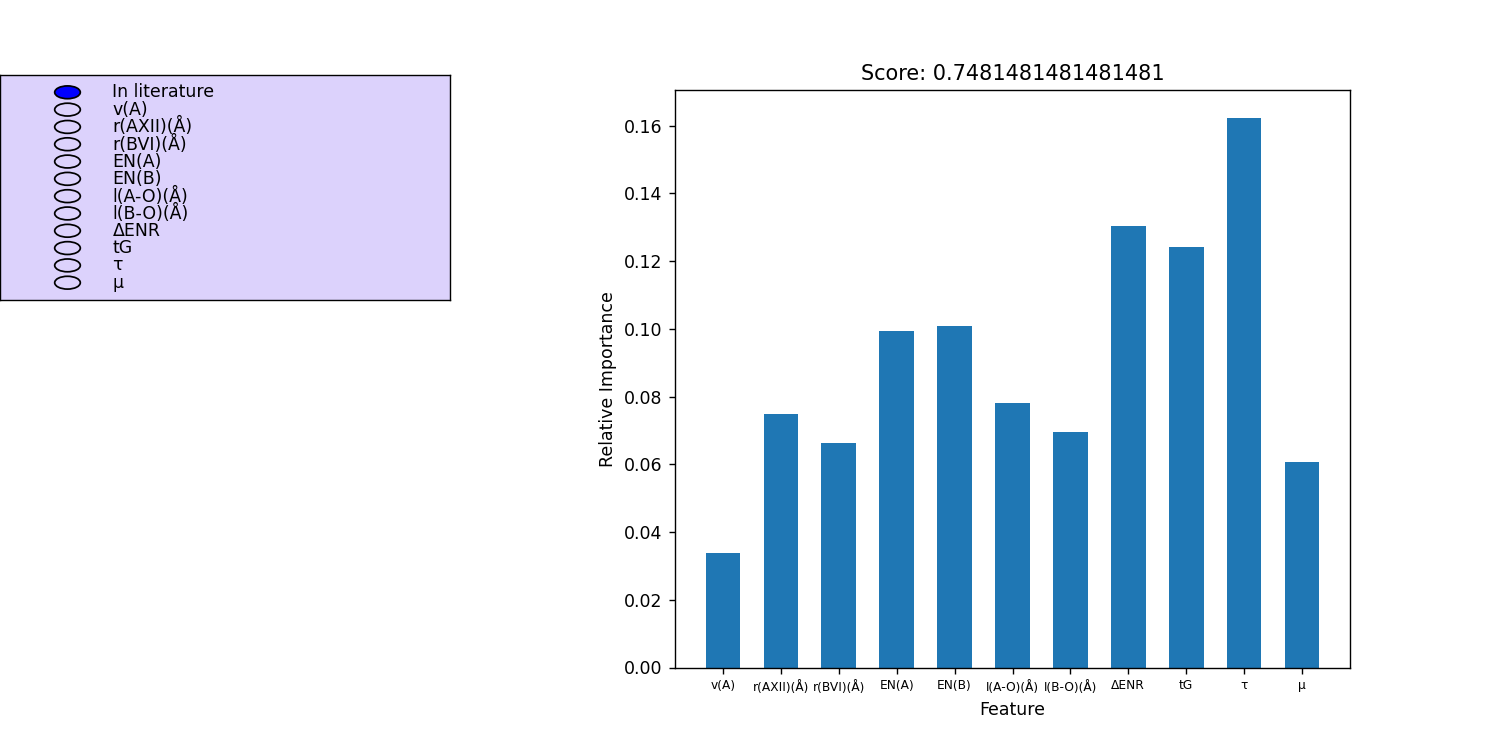

In [3]:
# create figure and axes - shift to the right
fig, ax = plt.subplots(figsize=(12,6))
plt.subplots_adjust(left=0.45)
plt.tick_params(axis='x', which='major', labelsize=7)

label_names = ['In literature', 'v(A)', 'r(AXII)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ']

# create radio box
radio_ax = plt.axes([0.0, 0.6, 0.3, 0.3], facecolor='#dcd2fc')

# create radio buttons
radio = matplotlib.widgets.RadioButtons(radio_ax, label_names)

# callback function to run when buttons are pressed
def callback(feature: str):
    """Plots a bar chart of the relative importances of the remaining features when a feature is removed."""
    # reset label names for every button press
    label_names = ['In literature', 'v(A)', 'r(AXII)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ']
    
    # remove feature from feature columns
    label_names.remove(feature)
    
    # clear plot
    ax.cla()
    
    # plot new bar chart with the corresponding feature importanec and accuracy score
    ax.bar(label_names, importances[feature], width=0.6)
    ax.set_title(f"Score: {accuracy[feature]}")
    
    ax.set_xlabel("Feature")
    ax.set_ylabel("Relative Importance")
    plt.xticks(rotation=45)
    return

# connect function to radio object and show
radio.on_clicked(callback)
plt.show()

In [ ]:
#